In [17]:
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [18]:
#root_load_model_path = '../../../models/sentiment_analysis/hyperparameter_tuning'
#root_load_model_path = '../../../models/sentiment_analysis/hyperparameter_tuning_and_oversampling'
#root_load_model_path = '../../../models/sentiment_analysis/baseline'
root_load_model_path = '../../../models/sentiment_analysis/oversampling'

In [19]:
vectorizers = [
    'tfidf_vectorizer', 
    'count_vectorizer'
]
classifiers = [
    'logistic_regression', 
    'linear_svc', 
    'multinomial_nb', 
    'decision_tree', 
    'random_forest'
]

models = {}

for c in classifiers:
    for v in vectorizers:
        name = f'{c}_with_{v}'
        models[name] = pickle.load(open(f'{root_load_model_path}/{name}.pkl', 'rb'))

In [20]:
df_reviews = pd.read_json('../../../data/processed/reviews.json.gz', orient="records", compression="gzip")

In [21]:
x = df_reviews[['cleaned_review']]
y = df_reviews[['sentiment']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_test_final = x_test['cleaned_review'].values
y_test_final = y_test['sentiment'].values

In [22]:
def cal_sensitivity(cm):
    FN = cm[1, 0]
    TP = cm[1, 1]
    return round(TP/float(FN + TP), 2)

def cal_specificity(cm):
    TN = cm[0, 0]
    FP = cm[0, 1]
    return round(TN / float(TN + FP), 2)

def comparison_table(f1_weighted_score_dict):
    df_model = pd.DataFrame(index=f1_weighted_score_dict.keys(), columns=['f1_weighted_score'])
    df_model['f1_weighted_score'] = f1_weighted_score_dict.values()
    return df_model

Evaluate Model [logistic_regression_with_tfidf_vectorizer]:
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('sampler', RandomOverSampler(random_state=42)),
                ('clf', LogisticRegression())])

Evaluation using hold-out validation (test set):
weighted average f1 score: 0.914976117528743

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.88      0.69      1725
           1       0.98      0.91      0.94     13165

    accuracy                           0.91     14890
   macro avg       0.77      0.90      0.82     14890
weighted avg       0.93      0.91      0.91     14890


Confusion Matrix:


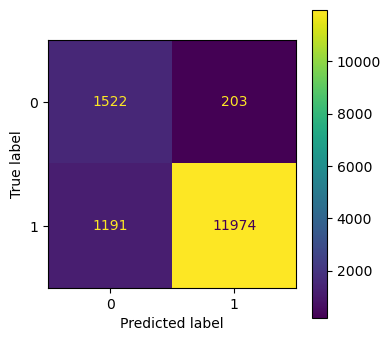

sensitivity (true positive): 0.91
specificity (true negative): 0.88
----------------------------------------------------------

Evaluate Model [logistic_regression_with_count_vectorizer]:
Pipeline(steps=[('vect', CountVectorizer()),
                ('sampler', RandomOverSampler(random_state=42)),
                ('clf', LogisticRegression())])

Evaluation using hold-out validation (test set):
weighted average f1 score: 0.9234876823548173

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      1725
           1       0.97      0.93      0.95     13165

    accuracy                           0.92     14890
   macro avg       0.79      0.87      0.83     14890
weighted avg       0.93      0.92      0.92     14890


Confusion Matrix:


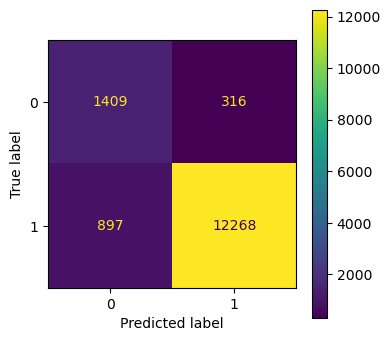

sensitivity (true positive): 0.93
specificity (true negative): 0.82
----------------------------------------------------------

Evaluate Model [linear_svc_with_tfidf_vectorizer]:
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('sampler', RandomOverSampler(random_state=42)),
                ('clf', LinearSVC())])

Evaluation using hold-out validation (test set):
weighted average f1 score: 0.9216427313102838

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.83      0.70      1725
           1       0.98      0.93      0.95     13165

    accuracy                           0.92     14890
   macro avg       0.79      0.88      0.82     14890
weighted avg       0.93      0.92      0.92     14890


Confusion Matrix:


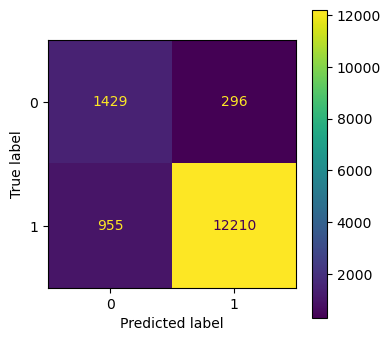

sensitivity (true positive): 0.93
specificity (true negative): 0.83
----------------------------------------------------------

Evaluate Model [linear_svc_with_count_vectorizer]:
Pipeline(steps=[('vect', CountVectorizer()),
                ('sampler', RandomOverSampler(random_state=42)),
                ('clf', LinearSVC())])

Evaluation using hold-out validation (test set):
weighted average f1 score: 0.925235937098666

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1725
           1       0.97      0.94      0.96     13165

    accuracy                           0.92     14890
   macro avg       0.80      0.86      0.83     14890
weighted avg       0.93      0.92      0.93     14890


Confusion Matrix:


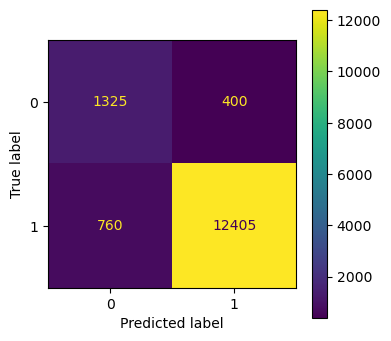

sensitivity (true positive): 0.94
specificity (true negative): 0.77
----------------------------------------------------------

Evaluate Model [multinomial_nb_with_tfidf_vectorizer]:
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('sampler', RandomOverSampler(random_state=42)),
                ('clf', MultinomialNB())])

Evaluation using hold-out validation (test set):
weighted average f1 score: 0.8855420460449274

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.87      0.61      1725
           1       0.98      0.87      0.92     13165

    accuracy                           0.87     14890
   macro avg       0.72      0.87      0.77     14890
weighted avg       0.92      0.87      0.89     14890


Confusion Matrix:


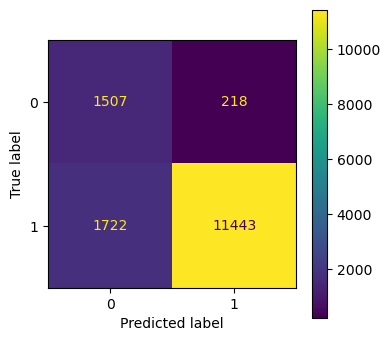

sensitivity (true positive): 0.87
specificity (true negative): 0.87
----------------------------------------------------------

Evaluate Model [multinomial_nb_with_count_vectorizer]:
Pipeline(steps=[('vect', CountVectorizer()),
                ('sampler', RandomOverSampler(random_state=42)),
                ('clf', MultinomialNB())])

Evaluation using hold-out validation (test set):
weighted average f1 score: 0.9049446500894867

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.82      0.65      1725
           1       0.97      0.91      0.94     13165

    accuracy                           0.90     14890
   macro avg       0.75      0.86      0.79     14890
weighted avg       0.92      0.90      0.90     14890


Confusion Matrix:


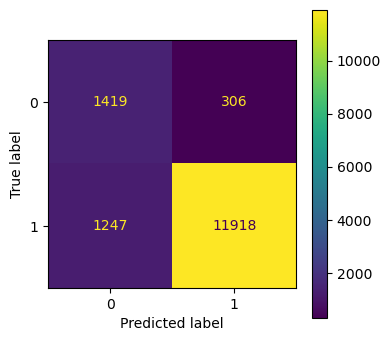

sensitivity (true positive): 0.91
specificity (true negative): 0.82
----------------------------------------------------------

Evaluate Model [decision_tree_with_tfidf_vectorizer]:
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('sampler', RandomOverSampler(random_state=42)),
                ('clf', DecisionTreeClassifier())])

Evaluation using hold-out validation (test set):
weighted average f1 score: 0.8963189387659471

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.62      0.57      1725
           1       0.95      0.93      0.94     13165

    accuracy                           0.89     14890
   macro avg       0.74      0.77      0.76     14890
weighted avg       0.90      0.89      0.90     14890


Confusion Matrix:


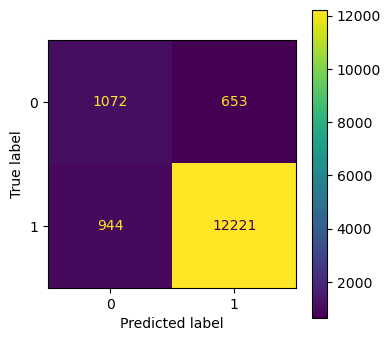

sensitivity (true positive): 0.93
specificity (true negative): 0.62
----------------------------------------------------------

Evaluate Model [decision_tree_with_count_vectorizer]:
Pipeline(steps=[('vect', CountVectorizer()),
                ('sampler', RandomOverSampler(random_state=42)),
                ('clf', DecisionTreeClassifier())])

Evaluation using hold-out validation (test set):
weighted average f1 score: 0.8981046583842239

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.63      0.58      1725
           1       0.95      0.93      0.94     13165

    accuracy                           0.89     14890
   macro avg       0.74      0.78      0.76     14890
weighted avg       0.90      0.89      0.90     14890


Confusion Matrix:


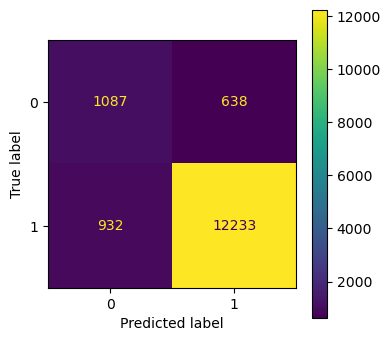

sensitivity (true positive): 0.93
specificity (true negative): 0.63
----------------------------------------------------------

Evaluate Model [random_forest_with_tfidf_vectorizer]:
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('sampler', RandomOverSampler(random_state=42)),
                ('clf', RandomForestClassifier())])

Evaluation using hold-out validation (test set):
weighted average f1 score: 0.9307103157536556

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.53      0.66      1725
           1       0.94      0.99      0.97     13165

    accuracy                           0.94     14890
   macro avg       0.92      0.76      0.81     14890
weighted avg       0.94      0.94      0.93     14890


Confusion Matrix:


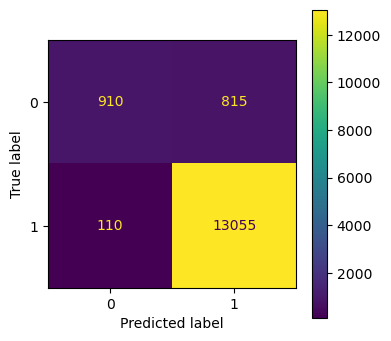

sensitivity (true positive): 0.99
specificity (true negative): 0.53
----------------------------------------------------------

Evaluate Model [random_forest_with_count_vectorizer]:
Pipeline(steps=[('vect', CountVectorizer()),
                ('sampler', RandomOverSampler(random_state=42)),
                ('clf', RandomForestClassifier())])

Evaluation using hold-out validation (test set):
weighted average f1 score: 0.9284388406582034

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.50      0.65      1725
           1       0.94      0.99      0.97     13165

    accuracy                           0.94     14890
   macro avg       0.93      0.75      0.81     14890
weighted avg       0.94      0.94      0.93     14890


Confusion Matrix:


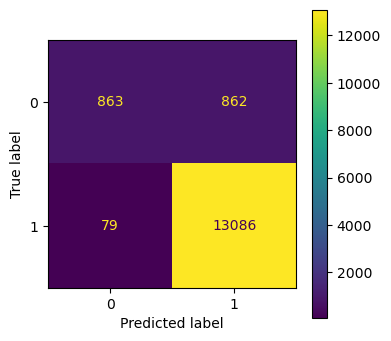

sensitivity (true positive): 0.99
specificity (true negative): 0.5
----------------------------------------------------------



In [23]:
f1_weighted_score_test_dict = {}

for key in models:
   model = models[key]

   print(f"Evaluate Model [{key}]:")
   print(model)

   y_pred = model.predict(x_test_final)
   f1_weighted_score_test = f1_score(y_test_final, y_pred, average = 'weighted')
   f1_weighted_score_test_dict[key] = f1_weighted_score_test
   
   print(f'\nEvaluation using hold-out validation (test set):')
   print(f'weighted average f1 score: {f1_weighted_score_test}')
   
   print("\nClassification Report:")
   print(classification_report(y_test_final, y_pred, labels=[0, 1]))

   print("\nConfusion Matrix:")
   cm = confusion_matrix(y_test_final, y_pred, labels=[0, 1])
   cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
   fig, ax = plt.subplots(figsize=(4,4))
   cm_display.plot(ax=ax)
   plt.show()
   print("sensitivity (true positive): {}".format(cal_sensitivity(cm)))
   print("specificity (true negative): {}".format(cal_specificity(cm)))
   
   print('----------------------------------------------------------\n')

In [24]:
print('Evaluation Metric for Different Models Using Testing Set:')
print(comparison_table(f1_weighted_score_test_dict))

Evaluation Metric for Different Models Using Testing Set:
                                           f1_weighted_score
logistic_regression_with_tfidf_vectorizer           0.914976
logistic_regression_with_count_vectorizer           0.923488
linear_svc_with_tfidf_vectorizer                    0.921643
linear_svc_with_count_vectorizer                    0.925236
multinomial_nb_with_tfidf_vectorizer                0.885542
multinomial_nb_with_count_vectorizer                0.904945
decision_tree_with_tfidf_vectorizer                 0.896319
decision_tree_with_count_vectorizer                 0.898105
random_forest_with_tfidf_vectorizer                 0.930710
random_forest_with_count_vectorizer                 0.928439
